In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv


<h1 style="text-align:center; color:#000080; font-weight:bold; font-size:38px;">Laptop Price Prediction</h1>

* <span style='color:#000080; font-size:18px;'>**Company: the manufacturer of the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**TypeName: the type or category of the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**Inches: the size of the laptop's screen in inches**</span>
* <span style='color:#000080; font-size:18px;'>**ScreenResolution: the resolution of the laptop's display screen**</span>
* <span style='color:#000080; font-size:18px;'>**Cpu: the central processing unit (CPU) used in the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**Ram: the amount of RAM (in gigabytes) available on the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**Memory: the storage capacity of the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**Gpu: the graphics processing unit (GPU) in the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**OpSys: the operating system running on the laptop**</span>
* <span style='color:#000080; font-size:18px;'>**Weight: the weight of the laptop in kilograms or pounds**</span>
* <span style='color:#000080; font-size:18px;'>**Price (INR): the retail price of the laptop in Indian Rupees**</span>

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Import Libraries</h1>

In [2]:
# Cleaning and Viualization Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import plotly.express as px
import plotly.subplots as sp
import plotly.colors as cl
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re

In [3]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [4]:
#Classification models
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.linear_model import (SGDClassifier, LogisticRegression, 
                                        LinearRegression,Ridge, Lasso, ElasticNet)

from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                                    GradientBoostingClassifier, AdaBoostRegressor)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, CatBoostRegressor

#Regression models
from sklearn.ensemble import (RandomForestRegressor,
                                ExtraTreesRegressor,
                                BaggingRegressor,
                                GradientBoostingRegressor,
                                HistGradientBoostingRegressor)

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [5]:
# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Remove Warnings</h1>

In [6]:
import warnings
warnings.simplefilter("ignore")

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;"> Reading the data</h1>

In [7]:
df=pd.read_csv('/kaggle/input/uncleaned-laptop-price-dataset/laptopData.csv')

In [8]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Exploration

In [9]:
df.shape

(1303, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


* ***There are some mistyped columns***
* ***We will fix this problem while cleaning process for each column***

In [11]:
num_cols = df.select_dtypes(include=['number'])\
                .columns.difference(['Unnamed: 0']).tolist()
cat_cols = df.select_dtypes(include=['object', 'category'])\
                .columns.difference(['Unnamed: 0']).tolist()

In [12]:
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in '{column}':\n{unique_values}\n")

In [13]:
show_unique_values(df[cat_cols])

Unique values in 'Company':
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' nan 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Unique values in 'Cpu':
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz' nan
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GH

* ***There are some feature can extertact from some coulmn like secondry storage***
* ***The Weight have value like '0.0002kg' we must drop it***
* ***There are some mistake like '?' we will drop it***

In [14]:
indices = [df[df[col] == '?'].index[0] for col in df.columns if '?' in df[col].values] \
                                    + [df[df['Weight'] == '0.0002kg'].index[0]]

In [15]:
df = df.drop(indices, axis=0)

In [16]:
def unique_counts(df):
    num_unique = df.nunique().sort_values(ascending=False)
    pct_unique = (df.nunique().sort_values(ascending=False) / len(df) * 100).round(3)
    pct_unique = pct_unique.astype(str) + '%'
    
    unique = pd.DataFrame({
        'Unique Count': num_unique,
        'Percentage Unique': pct_unique
    })

    return unique

In [17]:
unique_counts(df)

,Unique Count,Percentage Unique
Unnamed: 0,1269,97.691%
Price,774,59.584%
Weight,187,14.396%
Cpu,118,9.084%
Gpu,110,8.468%
ScreenResolution,40,3.079%
Memory,39,3.002%
Inches,24,1.848%
Company,19,1.463%
Ram,10,0.77%


In [18]:
def calculate_missing_data(df):

    missing_ratio = (df.isnull().sum() / len(df)) * 100

    missing_data = missing_ratio[missing_ratio > 0]

    missing_data_df = pd.DataFrame({'Missing Ratio %': missing_data}).sort_values('Missing Ratio %', ascending=False)

    return missing_data_df   

In [19]:
calculate_missing_data(df)

,Missing Ratio %
Unnamed: 0,2.309469
Company,2.309469
TypeName,2.309469
Inches,2.309469
ScreenResolution,2.309469
Cpu,2.309469
Ram,2.309469
Memory,2.309469
Gpu,2.309469
OpSys,2.309469


* ***It looks like we do not have any missing values***


In [20]:
df.duplicated().sum()

29

* **There 29 rows are null values**

In [21]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(1269, 11)

* **That's right the same number of info row there was 29 all null**

# Summary statistics of the data

In [24]:
df.describe()

,Price
count,1269.000000
mean,59905.427620
std,37332.122508
min,9270.720000
25%,31914.720000
50%,52054.560000
75%,79333.387200
max,324954.720000


In [25]:
df.describe(include = 'object')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269
unique,19,6,24,40,118,10,39,110,9,187
top,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,290,709,638,491,183,598,399,271,1043,111


# Split The Data

In [26]:
x = df.drop('Price',axis=1)
y = df[['Price']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
33,Dell,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.2kg,99580.32
162,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Windows 10,2.13kg,38787.84
746,Samsung,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,256GB SSD,Intel HD Graphics 620,Windows 10,0.81kg,87858.72
1069,Apple,Ultrabook,12,IPS Panel Retina Display 2304x1440,Intel Core M 1.1GHz,8GB,256GB Flash Storage,Intel HD Graphics 515,Mac OS X,0.920kg,69264.00
287,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7kg,52054.56


In [28]:
train.shape

(1015, 11)

# Data Preprocessing

* <span style='color: #000080; font-weight: bold; font-style: italic;'>At first, I will split the data into categorical and numerical.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>Then, I want to check on the data distribution, wrong values, and outliers.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>After that, I will check on the skewness, and finally, I will check on correlation and feature engineering.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>We may use methods like  Winsorization and power transformations for example if it was needed.</span>
* <span style='color: #000080; font-weight: bold; font-style: italic;'>After all this, I will start making pipelines to do these preprocessing steps in them.</span>

In [29]:
train_cop = train.copy()

In [30]:
train_cop['Ram'] = train_cop['Ram'].str.replace('GB', '').astype('int32')
train_cop['Weight'] = train_cop['Weight'].str.replace('kg', '').astype('float32')

## Data Label

In [31]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes] 
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f'Histogram with KDE for {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f'Box Plot for {column}')
    
    plt.tight_layout()
    plt.show()

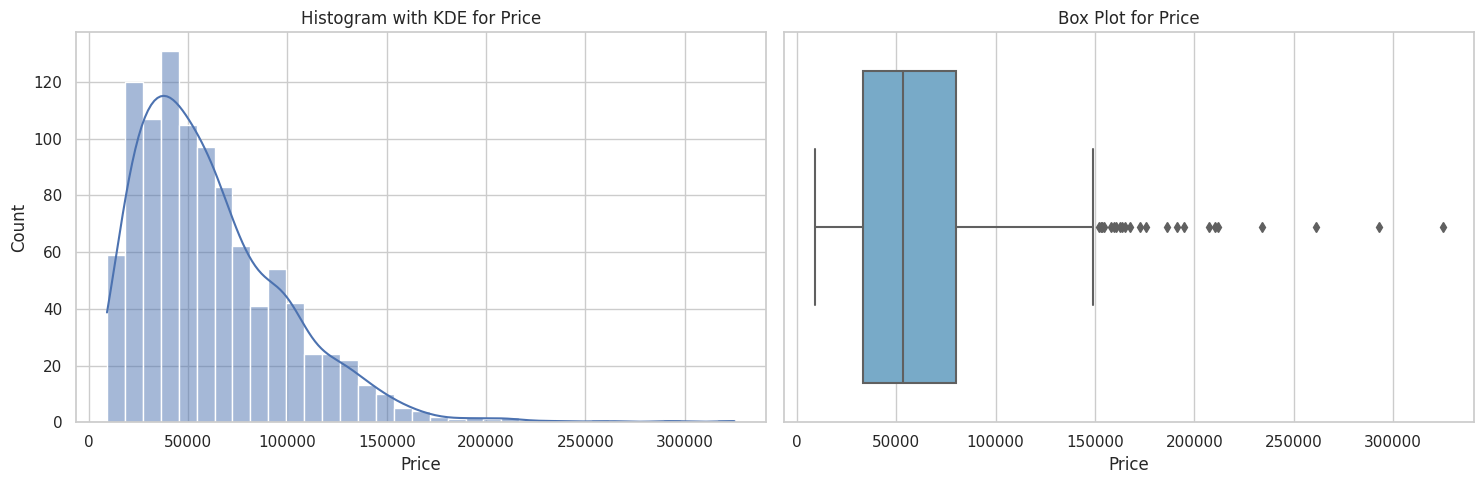

In [32]:
num_plot_dist(train_cop, ['Price'])

* **There are some skew must edit it**

In [33]:
train_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 33 to 1158
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1015 non-null   object 
 1   TypeName          1015 non-null   object 
 2   Inches            1015 non-null   object 
 3   ScreenResolution  1015 non-null   object 
 4   Cpu               1015 non-null   object 
 5   Ram               1015 non-null   int32  
 6   Memory            1015 non-null   object 
 7   Gpu               1015 non-null   object 
 8   OpSys             1015 non-null   object 
 9   Weight            1015 non-null   float32
 10  Price             1015 non-null   float64
dtypes: float32(1), float64(1), int32(1), object(8)
memory usage: 87.2+ KB


## Company

In [34]:
def plot_dist_cat(df, cat_features):
    fig, axes = plt.subplots(len(cat_features), 1, figsize=(15, len(cat_features) * 5))
    if len(cat_features) == 1:
        axes = [axes]
    for i, column in enumerate(cat_features):
        order = df[column].value_counts().index  
        sns.countplot(data=df, x=column, order=order, ax=axes[i], palette="Blues_d", saturation=0.8)
        axes[i].set_title(f'Count Plot for {column}')
        axes[i].tick_params(axis='x', rotation=90) 

    plt.tight_layout()
    plt.show()

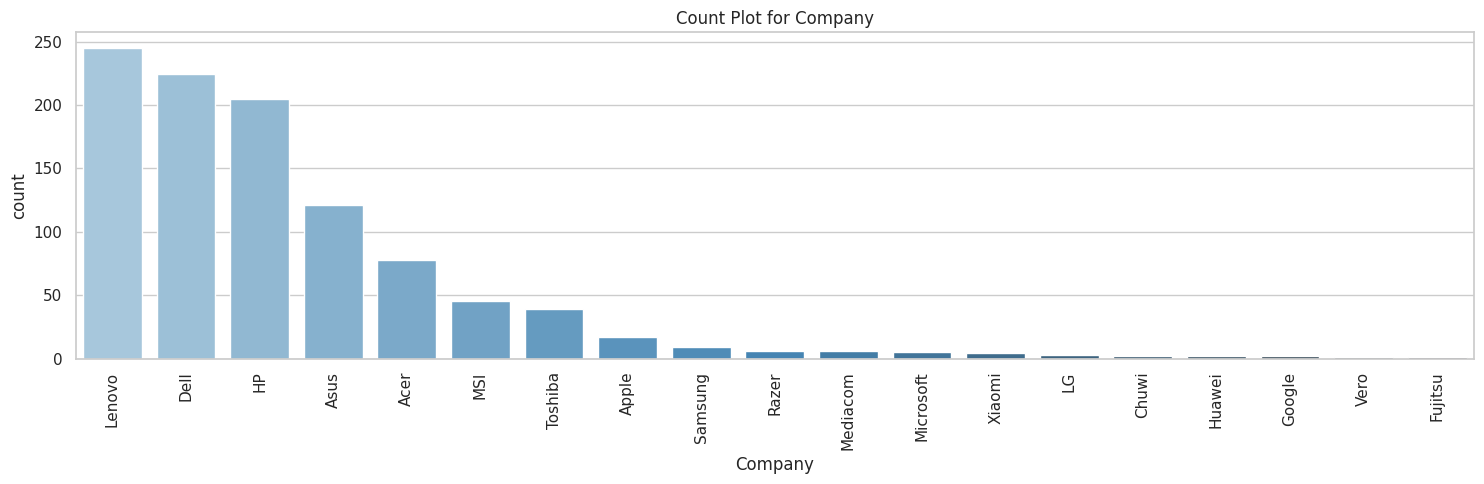

In [35]:
plot_dist_cat(train_cop,['Company'])

* **There are some category is litte can replace all with 'other'**

In [36]:
def label_plot_dist_cat(df, cat_features, target):
   
    fig, axes = plt.subplots(len(cat_features), 1, figsize=(15, len(cat_features) * 5))
    if  len(cat_features) == 1:
        axes = [axes]
    for i, column in enumerate(cat_features):
        order = df.groupby(column)[target].mean().sort_values(ascending=False).index
        sns.barplot(data=df, x=column, y=target, order=order, ax=axes[i], palette="Blues_d", saturation=0.8)
        axes[i].set_title(f'Bar Plot for {column} with Avg {target}')
        axes[i].tick_params(axis='x', rotation=90) 

    plt.tight_layout()
    plt.show()

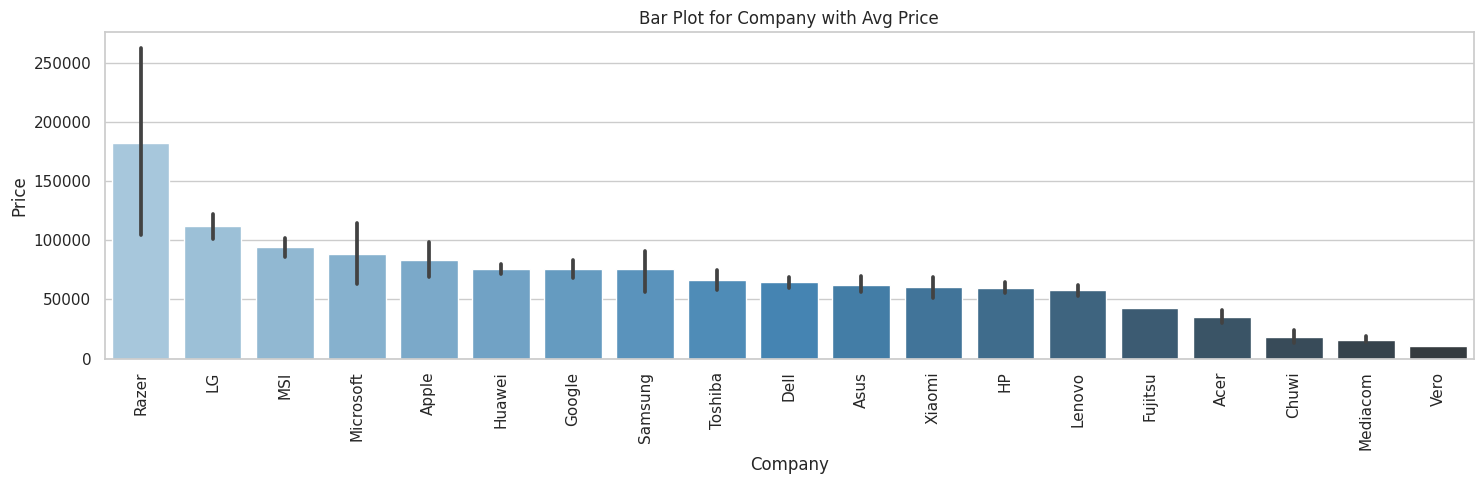

In [37]:
label_plot_dist_cat(train_cop, ['Company'], 'Price')

## TypeName

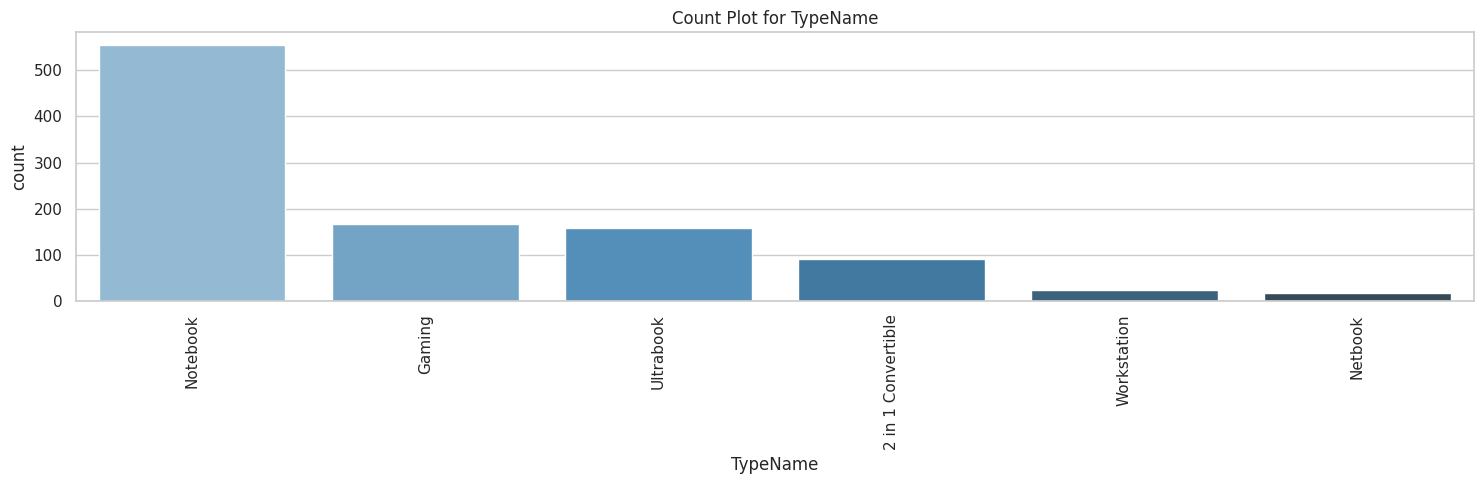

In [38]:
plot_dist_cat(train_cop, ['TypeName'])

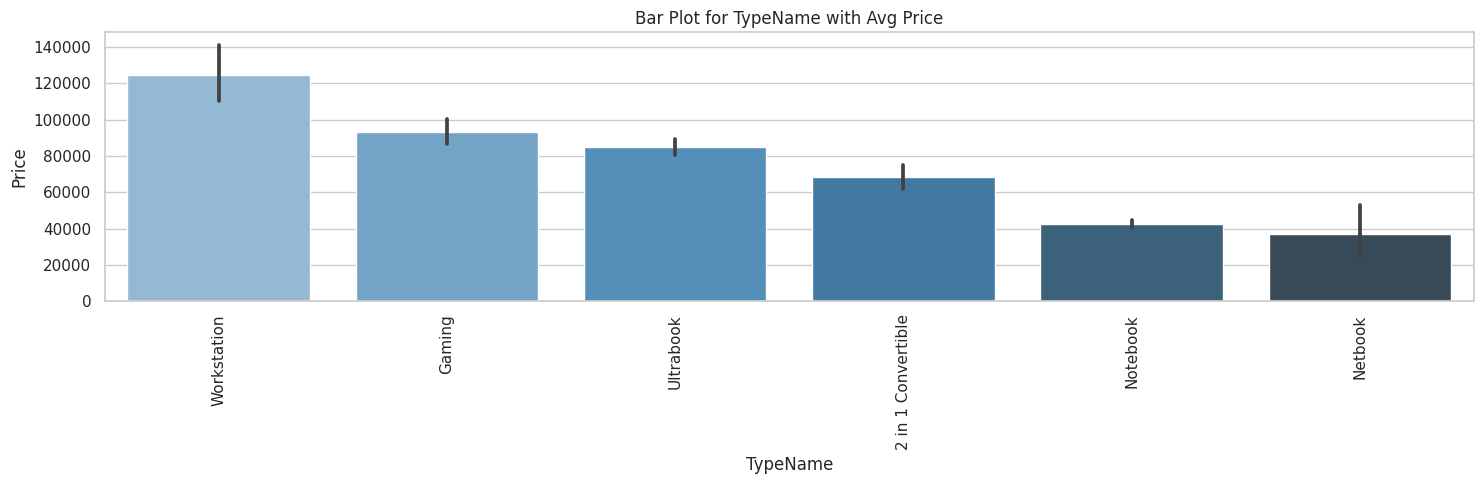

In [39]:
label_plot_dist_cat(train_cop, ['TypeName'], 'Price')

<h1 style="text-align:left; color:#00bfff; font-weight:bold; font-size:28px;">Inches</h1>

In [40]:
def num_plot_dist(df, num_features):
    fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes] 
    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
        axes[i][0].set_title(f'Histogram with KDE for {column}')
        
        sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
        axes[i][1].set_title(f'Box Plot for {column}')
    
    plt.tight_layout()
    plt.show()

In [41]:
def label_plot_dist_num(df, num_features, target):

    fig, axes = plt.subplots(len(num_features), 1, figsize=(15, len(num_features) * 5))
    if len(num_features) == 1:
        axes = [axes]
    for i, column in enumerate(num_features):
        sns.scatterplot(data=df, x=column, y=target, ax=axes[i], palette="Blues")
        axes[i].set_title(f'Scatter Plot for {column} vs {target}')

    plt.tight_layout()
    plt.show()

In [42]:
train_cop['Inches'] = pd.to_numeric(train_cop['Inches'], errors='coerce')

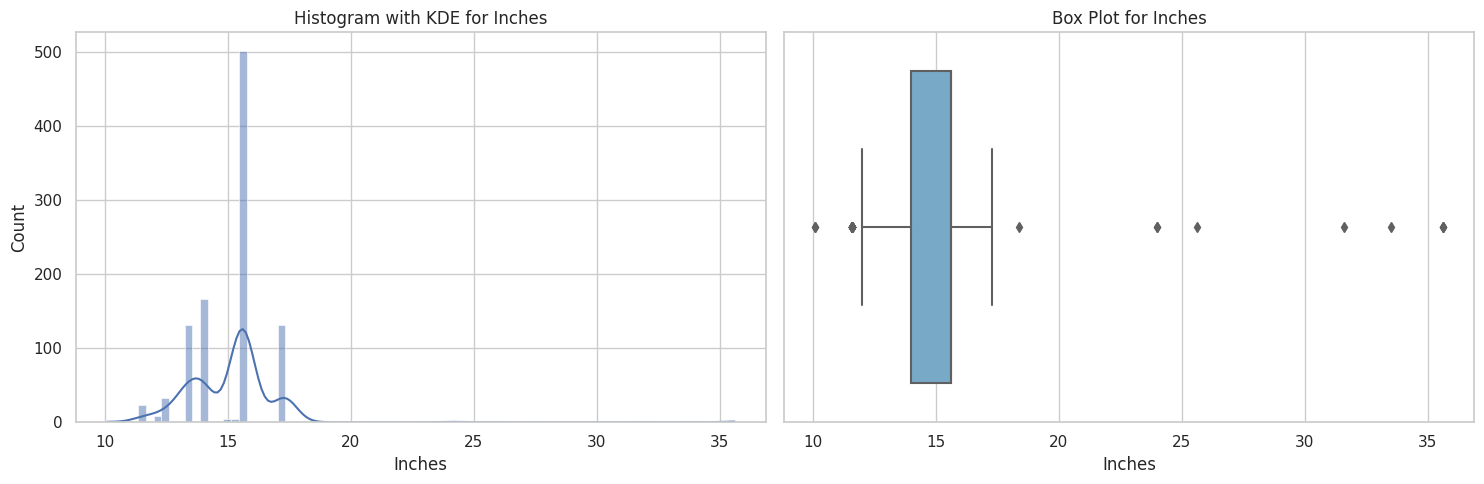

In [43]:
num_plot_dist(train_cop, ['Inches'])

* **remove skewness**
* **the data not normal distrubtion**

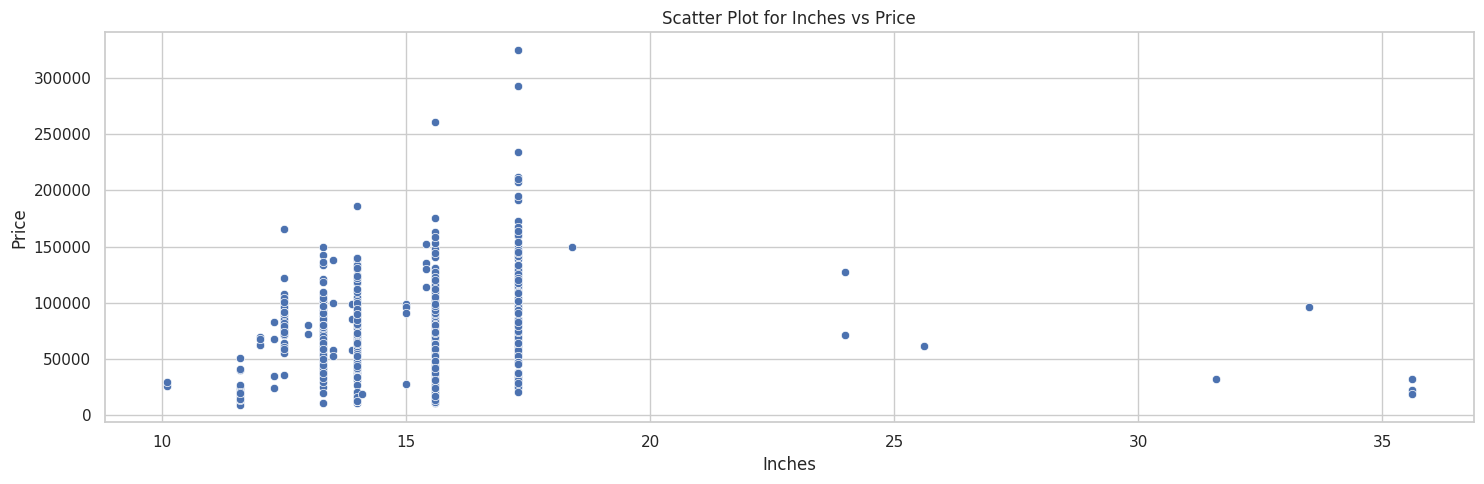

In [44]:
label_plot_dist_num(train_cop, ['Inches'], 'Price')

## ScreenResolution

In [45]:
train_cop['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                401
1366x768                                         201
IPS Panel Full HD 1920x1080                      188
IPS Panel Full HD / Touchscreen 1920x1080         43
Full HD / Touchscreen 1920x1080                   35
1600x900                                          16
Quad HD+ / Touchscreen 3200x1800                  12
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD 3840x2160                   10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
4K Ultra HD / Touchscreen 3840x2160                8
Touchscreen 2560x1440                              6
IPS Panel 1366x768                                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
4K Ultra HD 3840x2160                              6
IPS Panel Touchscreen 2560x1440                    5
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2560x1600                 4
1440x900                     

In [46]:
train_cop['Touchscreen'] = train_cop['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [47]:
train_cop['Touchscreen'].value_counts()

Touchscreen
0    864
1    151
Name: count, dtype: int64

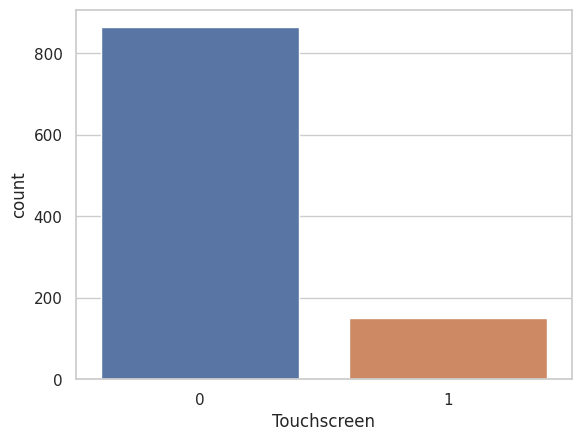

In [48]:
sns.countplot(x='Touchscreen', data=train_cop)
plt.show()

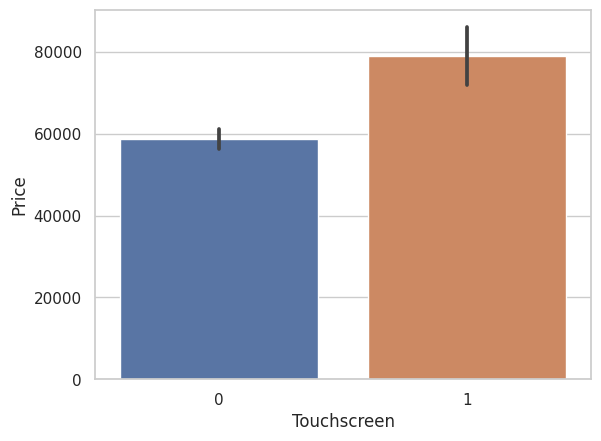

In [49]:
sns.barplot(x=train_cop['Touchscreen'], y=train_cop['Price'])
plt.show()

* **we see the touchscreen is expensive that's normal**

In [50]:
train_cop['Ips'] = train_cop['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

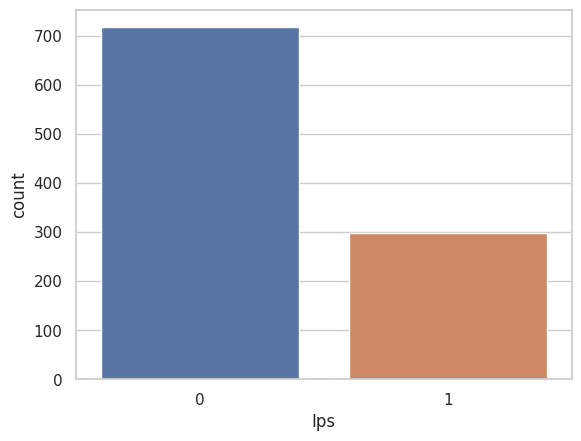

In [51]:
sns.countplot(x='Ips', data=train_cop)
plt.show()

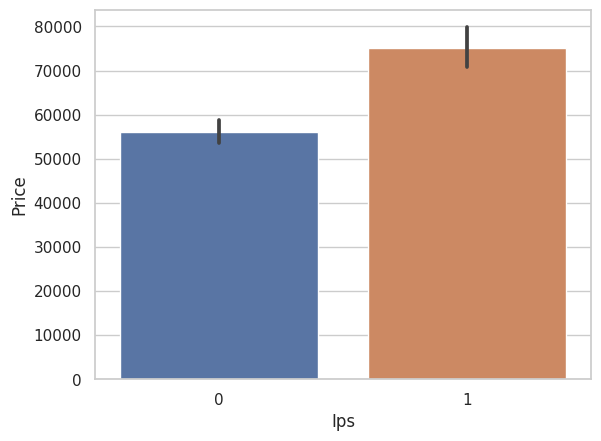

In [52]:
sns.barplot(x=train_cop['Ips'], y=train_cop['Price'])
plt.show()

In [53]:
train_cop['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                401
1366x768                                         201
IPS Panel Full HD 1920x1080                      188
IPS Panel Full HD / Touchscreen 1920x1080         43
Full HD / Touchscreen 1920x1080                   35
1600x900                                          16
Quad HD+ / Touchscreen 3200x1800                  12
Touchscreen 1366x768                              11
IPS Panel 4K Ultra HD 3840x2160                   10
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      9
4K Ultra HD / Touchscreen 3840x2160                8
Touchscreen 2560x1440                              6
IPS Panel 1366x768                                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
4K Ultra HD 3840x2160                              6
IPS Panel Touchscreen 2560x1440                    5
Touchscreen 2256x1504                              5
IPS Panel Retina Display 2560x1600                 4
1440x900                     

In [54]:
res = train_cop['ScreenResolution'].str.extract(r'(\d+x\d+)')

In [55]:
res_split = res[0].str.split('x', n=1, expand=True)

In [56]:
res_split.columns = ["X_res", "Y_res"]

In [57]:
res_split

,X_res,Y_res
33,3200,1800
162,1920,1080
746,1920,1080
1069,2304,1440
287,1920,1080
...,...,...
1076,1920,1080
1127,1366,768
1162,1920,1080
886,1366,768


In [58]:
train_cop = pd.concat([train_cop, res_split], axis=1)

In [59]:
train_cop['X_res'] = train_cop['X_res'].astype('int')
train_cop['Y_res'] = train_cop['Y_res'].astype('int')

In [60]:
train_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1015 entries, 33 to 1158
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1015 non-null   object 
 1   TypeName          1015 non-null   object 
 2   Inches            1015 non-null   float64
 3   ScreenResolution  1015 non-null   object 
 4   Cpu               1015 non-null   object 
 5   Ram               1015 non-null   int32  
 6   Memory            1015 non-null   object 
 7   Gpu               1015 non-null   object 
 8   OpSys             1015 non-null   object 
 9   Weight            1015 non-null   float32
 10  Price             1015 non-null   float64
 11  Touchscreen       1015 non-null   int64  
 12  Ips               1015 non-null   int64  
 13  X_res             1015 non-null   int64  
 14  Y_res             1015 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 118.9+ KB


In [61]:
train_cop.select_dtypes(include='number').corr()['Price']

Inches         0.041257
Ram            0.678076
Weight         0.192675
Price          1.000000
Touchscreen    0.188772
Ips            0.225024
X_res          0.545953
Y_res          0.541564
Name: Price, dtype: float64

## Pixels Per Inch

In [62]:
train_cop['ppi'] = (((train_cop['X_res']**2) + (train_cop['Y_res']**2))**0.5/train_cop['Inches']).astype('float')

In [63]:
train_cop.select_dtypes(include='number').corr()['Price']

Inches         0.041257
Ram            0.678076
Weight         0.192675
Price          1.000000
Touchscreen    0.188772
Ips            0.225024
X_res          0.545953
Y_res          0.541564
ppi            0.453454
Name: Price, dtype: float64

* **will drop X_res and Y_res and Inches to multicollinearity**


In [64]:
train_cop.drop(columns=['ScreenResolution', 'X_res', 'Y_res', 'Inches'], inplace=True)

## CPU

In [65]:
train_cop['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              144
Intel Core i7 7700HQ 2.8GHz             119
Intel Core i7 7500U 2.7GHz              107
Intel Core i5 8250U 1.6GHz               59
Intel Core i5 6200U 2.3GHz               56
                                       ... 
Intel Core i5 2.9GHz                      1
Intel Pentium Dual Core N4200 1.1GHz      1
Intel Core M 7Y30 1.0GHz                  1
Intel Xeon E3-1535M v6 3.1GHz             1
AMD FX 9830P 3GHz                         1
Name: count, Length: 108, dtype: int64

In [66]:
train_cop['Cpu Name'] = train_cop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [67]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [68]:
train_cop['Cpu brand'] = train_cop['Cpu Name'].apply(lambda x:fetch_processor(x))

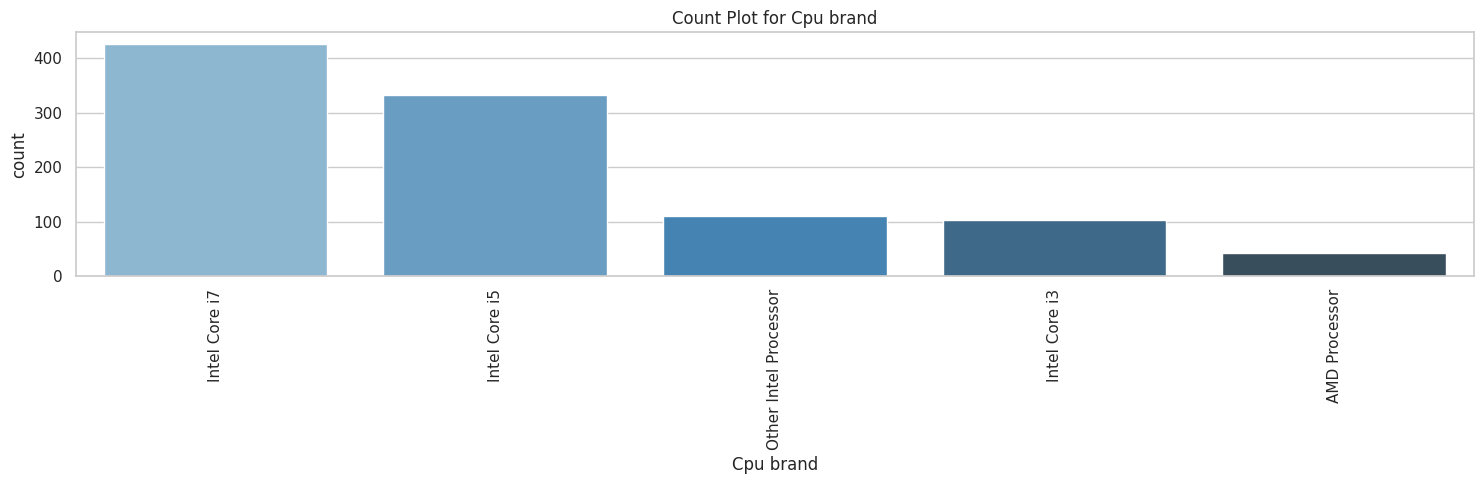

In [69]:
plot_dist_cat(train_cop, ['Cpu brand'])

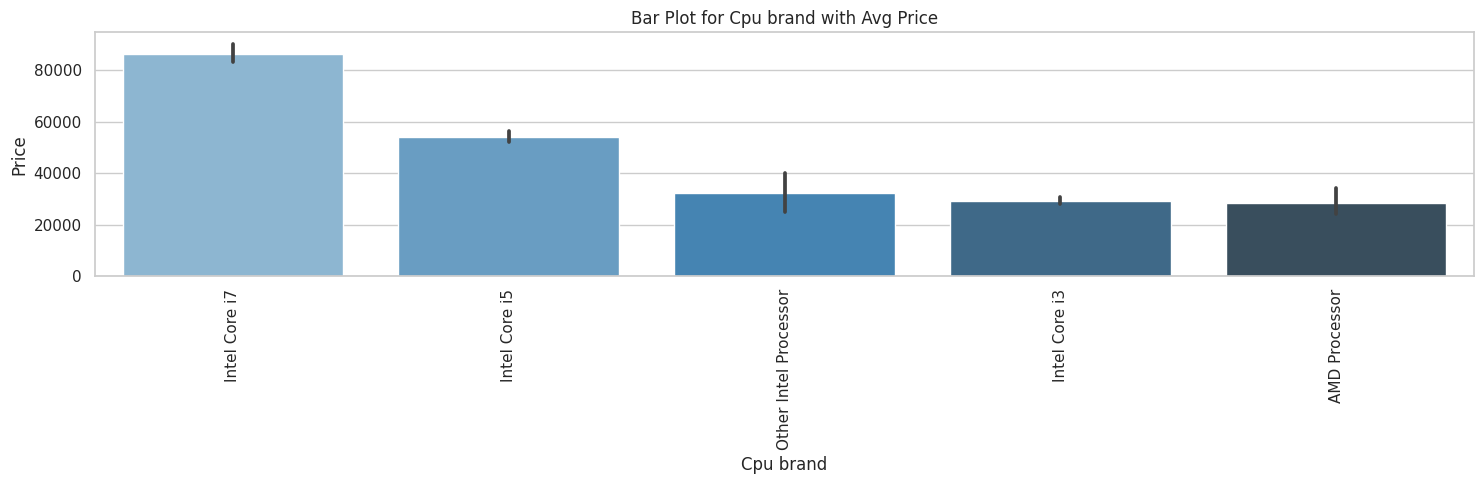

In [70]:
label_plot_dist_cat(train_cop, ['Cpu brand'], 'Price')

In [71]:
train_cop.drop(['Cpu','Cpu Name'], axis = 1, inplace = True)

## Ram

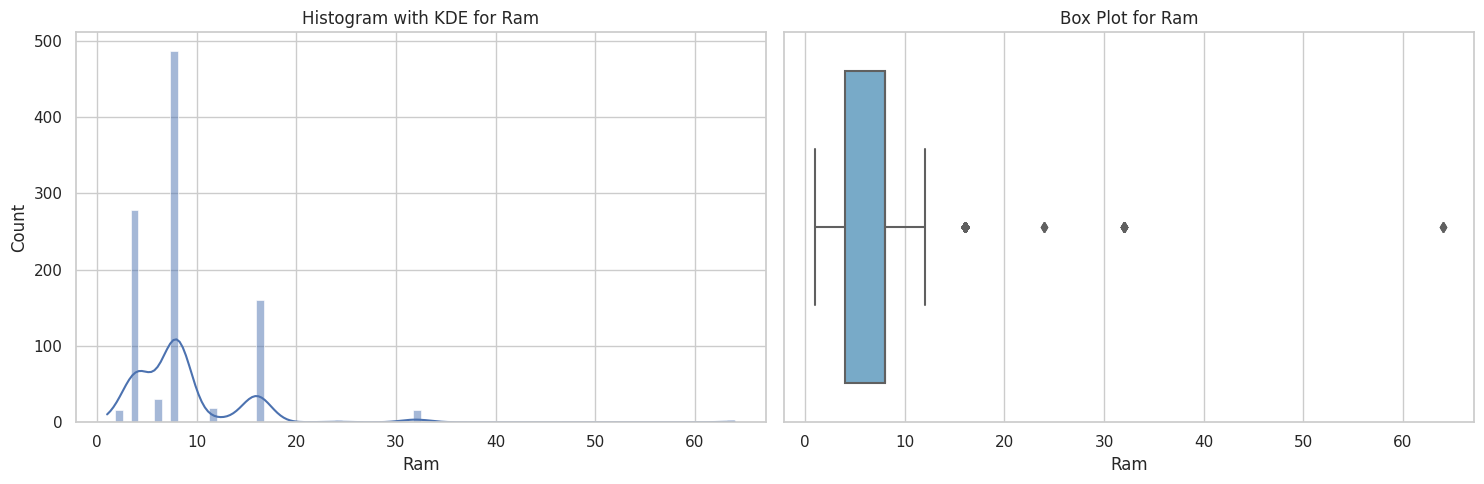

In [72]:
num_plot_dist(train_cop, ['Ram'])

* **there some skwnes must solve**

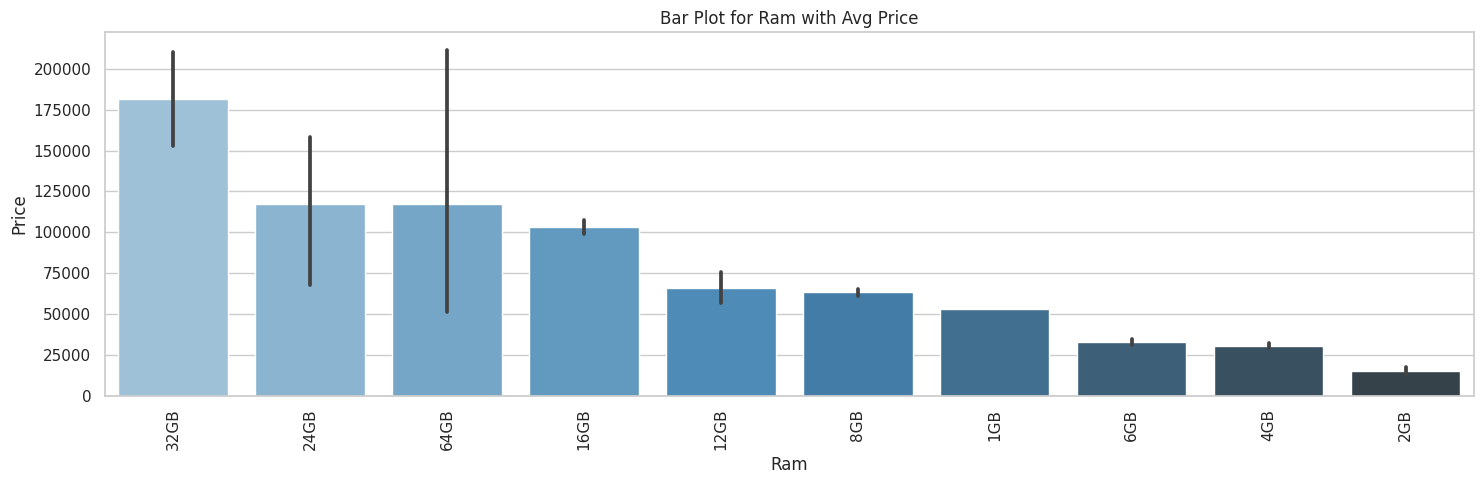

In [73]:
label_plot_dist_cat(df, ['Ram'], 'Price')

* **Ram 64GB is less from 32GB and 24GB that for the number of laptop of 64GB less is 3 and the price is low Because the specifications of the other devices are higher**

## Memory

In [74]:
train_cop['Memory']

33                512GB SSD
162               256GB SSD
746               256GB SSD
1069    256GB Flash Storage
287               256GB SSD
               ...         
1076                1TB HDD
1127              256GB SSD
1162                1TB HDD
886                 1TB HDD
1158           1.0TB Hybrid
Name: Memory, Length: 1015, dtype: object

In [75]:
train_cop['Memory'].value_counts()

Memory
256GB SSD                        327
1TB HDD                          169
500GB HDD                         96
512GB SSD                         94
128GB SSD +  1TB HDD              77
256GB SSD +  1TB HDD              58
128GB SSD                         56
32GB Flash Storage                27
2TB HDD                           14
1TB SSD                           12
64GB Flash Storage                11
512GB SSD +  1TB HDD              11
1.0TB Hybrid                       8
256GB Flash Storage                7
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           6
180GB SSD                          4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
256GB SSD +  1.0TB Hybrid          1
64GB Flash Storage +  1TB HDD      1
512GB SSD +  1.0TB Hybrid      

In [76]:
train_cop['Memory'] = train_cop['Memory'].str.replace('\.0', '', regex=True)
train_cop["Memory"] = train_cop["Memory"].str.replace('GB', '')
train_cop["Memory"] = train_cop["Memory"].str.replace('TB', '000')

new = train_cop["Memory"].str.split("+", n = 1, expand = True)

train_cop["first"]= new[0]
train_cop["first"]=train_cop["first"].str.strip()

train_cop["second"]= new[1]

train_cop["Layer1HDD"] = train_cop["first"].apply(lambda x: 1 if "HDD" in x else 0)
train_cop["Layer1SSD"] = train_cop["first"].apply(lambda x: 1 if "SSD" in x else 0)
train_cop["Layer1Hybrid"] = train_cop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
train_cop["Layer1Flash_Storage"] = train_cop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

train_cop['first'] = train_cop['first'].str.replace(r'\D', '' , regex=True)

train_cop["second"].fillna("0", inplace = True)

train_cop["Layer2HDD"] = train_cop["second"].apply(lambda x: 1 if "HDD" in x else 0)
train_cop["Layer2SSD"] = train_cop["second"].apply(lambda x: 1 if "SSD" in x else 0)
train_cop["Layer2Hybrid"] = train_cop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
train_cop["Layer2Flash_Storage"] = train_cop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
train_cop['second'] = train_cop['second'].str.replace(r'\D', '', regex=True)

train_cop["first"] = train_cop["first"].astype(int)
train_cop["second"] = train_cop["second"].astype(int)

train_cop["HDD"]=(train_cop["first"]*train_cop["Layer1HDD"]+train_cop["second"]*train_cop["Layer2HDD"])
train_cop["SSD"]=(train_cop["first"]*train_cop["Layer1SSD"]+train_cop["second"]*train_cop["Layer2SSD"])
train_cop["Hybrid"]=(train_cop["first"]*train_cop["Layer1Hybrid"]+train_cop["second"]*train_cop["Layer2Hybrid"])
train_cop["Flash_Storage"]=(train_cop["first"]*train_cop["Layer1Flash_Storage"]+train_cop["second"]*train_cop["Layer2Flash_Storage"])


train_cop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [77]:
train_cop.drop(columns=['Memory'],inplace=True)

## Gpu

In [78]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      65
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [79]:
train_cop['Gpu brand'] = train_cop['Gpu'].apply(lambda x:x.split()[0])

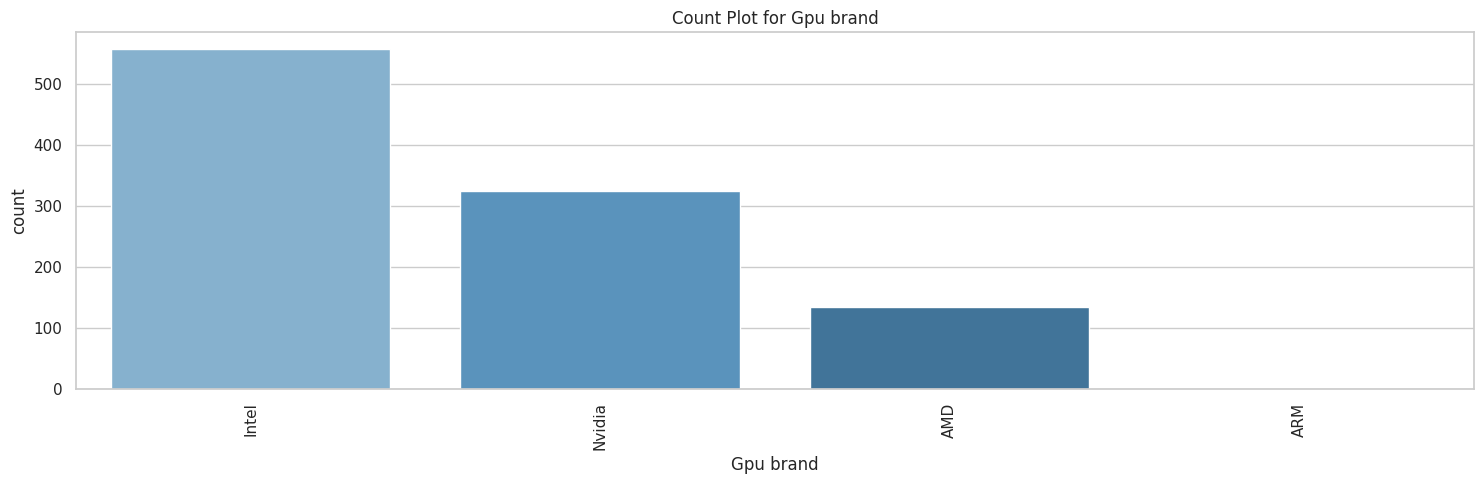

In [80]:
plot_dist_cat(train_cop, ['Gpu brand'])

* **ARM is one only so i will drop it**

In [81]:
train_cop = train_cop[train_cop['Gpu brand']!='ARM']

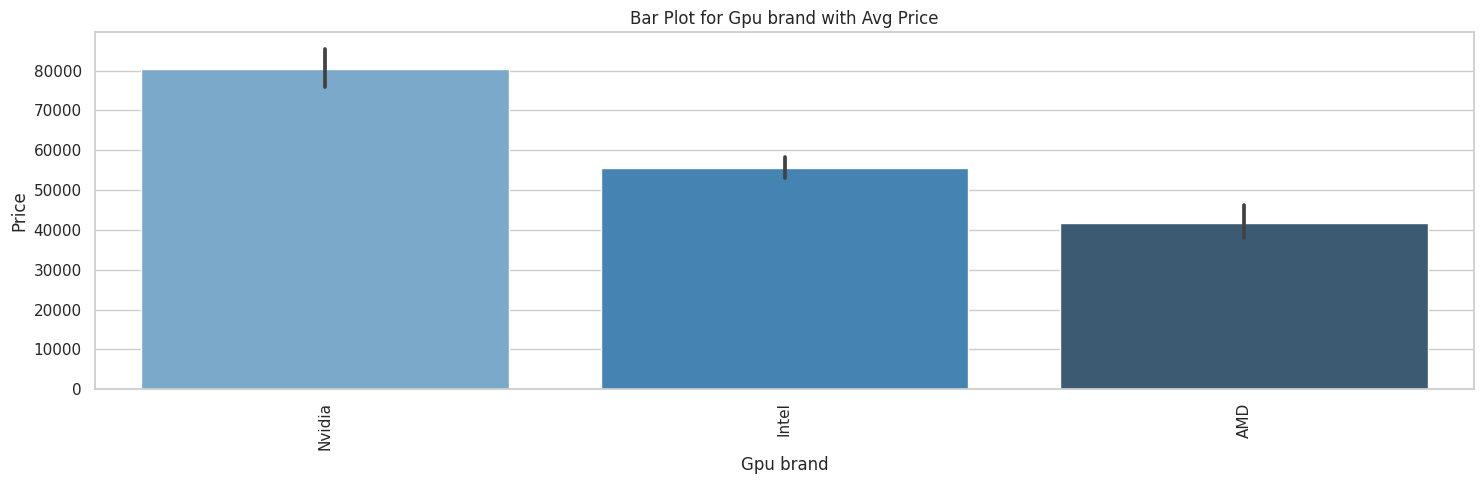

In [82]:
label_plot_dist_cat(train_cop, ['Gpu brand'], 'Price')

In [83]:
train_cop.drop(['Gpu'], axis=1,inplace = True)

## Operating System

In [84]:
train_cop['OpSys'].value_counts()

OpSys
Windows 10      832
No OS            57
Linux            41
Windows 7        38
Chrome OS        22
macOS            10
Mac OS X          7
Windows 10 S      6
Android           1
Name: count, dtype: int64

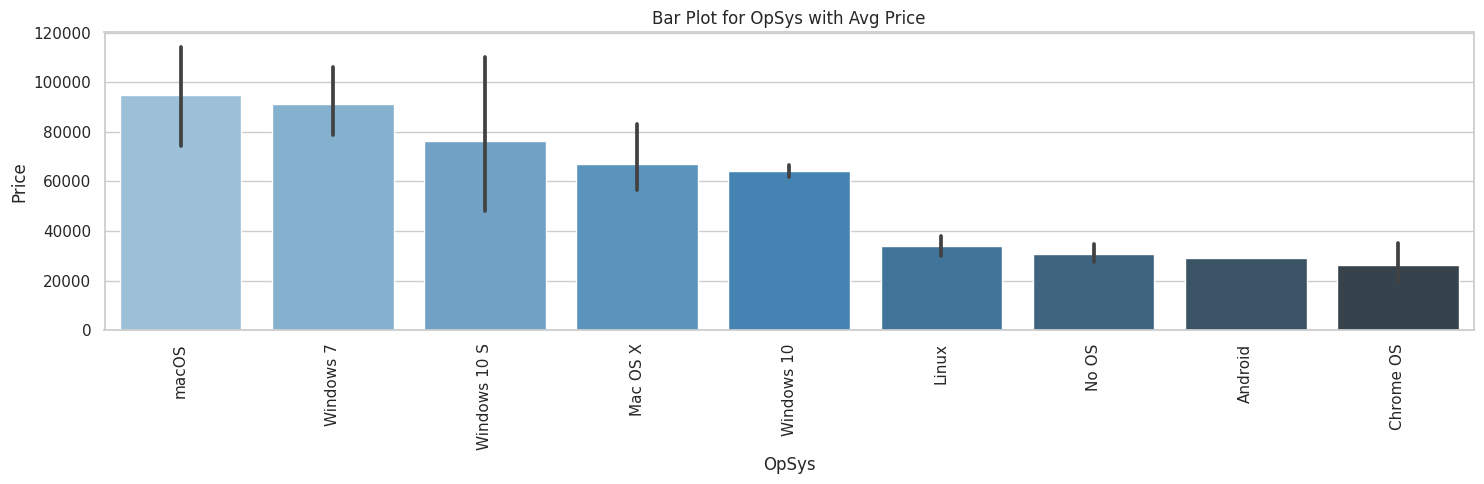

In [85]:
label_plot_dist_cat(train_cop, ['OpSys'], 'Price')

* **we can make 3 types mac and windows and other**

In [86]:
def cat_os(x):
    x_lower = x.lower()
    if "windows" in x_lower:
        return "Windows"
    elif "mac" in x_lower:
        return "Mac"
    else:
        return "Others/No OS/Linux"


In [87]:
train_cop['os'] = train_cop['OpSys'].apply(lambda x:cat_os(x))

In [88]:
train_cop.drop(['OpSys'], axis=1, inplace = True)

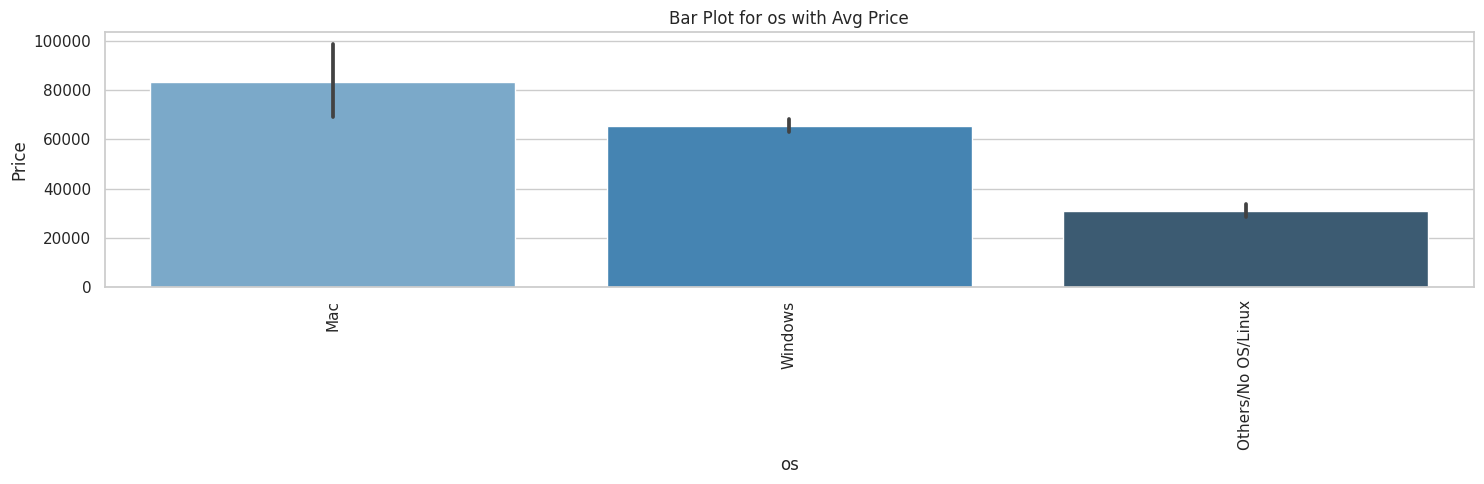

In [89]:
label_plot_dist_cat(train_cop, ['os'], 'Price')

* **This was expected the mac is higher from other**

## Weight

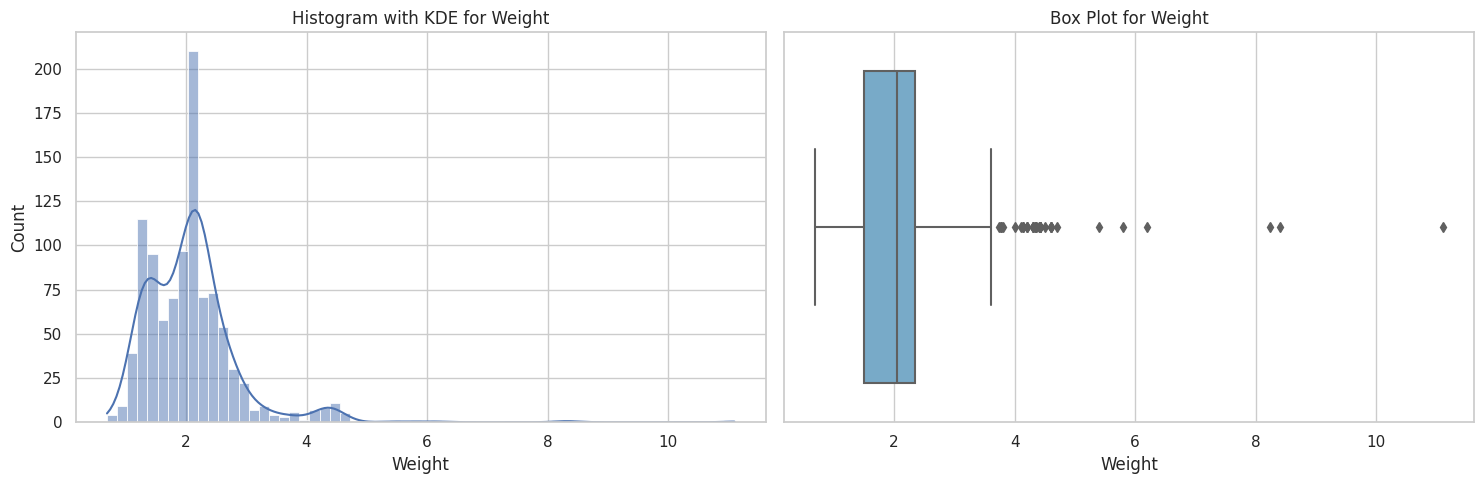

In [90]:
num_plot_dist(train_cop, ['Weight'])

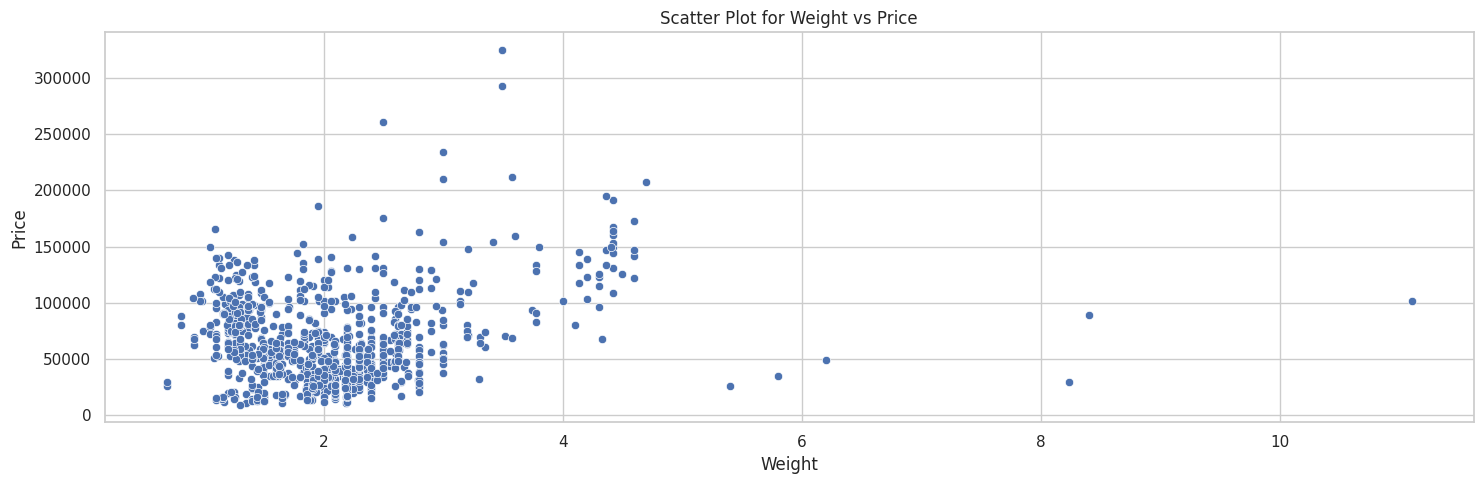

In [91]:
label_plot_dist_num(train_cop, ['Weight'], 'Price')

In [92]:
num_cols =  list(set(train_cop.select_dtypes(include = 'number').columns)-set(['Touchscreen', 'Ips']))

In [93]:
def drop_highly_correlated_features(df, target_col, num_cols, corr_threshold=0.7, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []

    # Correlation matrix for the numerical columns
    corr_matrix = df[num_cols].corr()

    for row_idx in range(corr_matrix.values.shape[0]):
        for col_idx in range(row_idx + 1, corr_matrix.values.shape[0]):
            if np.abs(corr_matrix.values[row_idx, col_idx]) > corr_threshold:
                # Calculate correlation of each feature with the target variable
                var_row_corr_with_response = np.abs(np.corrcoef(df[target_col], df[num_cols[row_idx]])[0, 1])
                var_col_corr_with_response = np.abs(np.corrcoef(df[target_col], df[num_cols[col_idx]])[0, 1])
                
                if var_row_corr_with_response > var_col_corr_with_response:
                    print(f"We will drop the column '{num_cols[col_idx]}' due to lower correlation with target '{target_col}'")
                    df = df.drop(columns=[num_cols[col_idx]])
                else:
                    print(f"We will drop the column '{num_cols[row_idx]}' due to lower correlation with target '{target_col}'")
                    df = df.drop(columns=[num_cols[row_idx]])


In [94]:
drop_highly_correlated_features(train_cop, "Price", num_cols)

* **no highly correlated feature**

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def drop_high_vif_features(X_train, vif_threshold=20):

    feats_high_vif_to_be_dropped = []  # List to store the names of features dropped
    cleaned_df_from_multi_coll = X_train.copy()  # Start with a copy of the original dataframe
    num_cols_removed = 0  # Initialize a counter for the number of columns removed
    
    # Loop through the features of the dataframe
    for origin_df_feat_index in range(len(X_train.columns)):
        num_cols_removed = X_train.shape[1] - cleaned_df_from_multi_coll.shape[1]
        cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
        
        # Calculate the VIF for the current feature
        VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
        
        # If VIF exceeds the threshold, drop the feature
        if VIF_FEAT > vif_threshold:
            feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
            cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns=[cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])
    
    return cleaned_df_from_multi_coll, feats_high_vif_to_be_dropped

In [96]:
_,feats_high_vif_to_be_dropped=drop_high_vif_features(train_cop[num_cols])

In [97]:
feats_high_vif_to_be_dropped

[]

* **No multicollinearity feature**

# Skewness

In [98]:
def skewness_heatmap(df, num_features, center_value=0):
    # Calculate skewness and prepare DataFrame
    skewness_df = pd.DataFrame(df[num_features].skew().sort_values(), columns=["Skewness"])
    
    # Create the heatmap
    sns.heatmap(skewness_df, cmap='coolwarm', annot=True, cbar=True,
                center=center_value, vmin=-abs(skewness_df).max().max(), vmax=abs(skewness_df).max().max())
    
    plt.title("Skewness Heatmap")
    plt.xlabel("Skewness")
    plt.show()

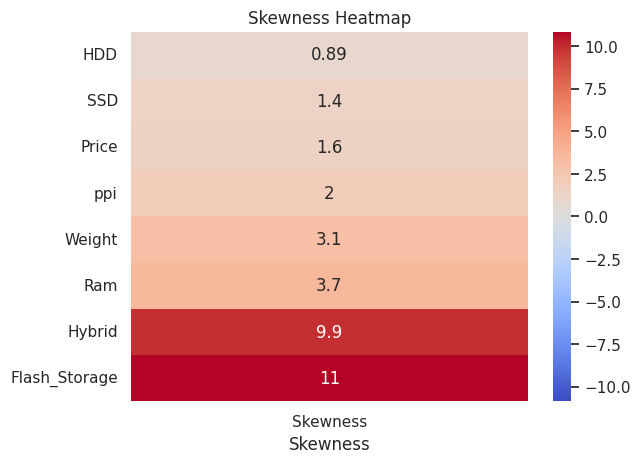

In [99]:
skewness_heatmap(train_cop, num_cols)

* **there some columns are skwnenss must remove it (SSD, Price , ppi , Touchscreen , Weight , Ram , Hybrid, Flash_Storage)**

In [100]:
def transform_skewed_columns(df, skew_threshold=1):
    
    df_copy = df.copy()
    
    
    numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
    
    
    for col in numeric_cols:
        skewness = df_copy[col].skew()
        if abs(skewness) > skew_threshold:
            df_copy[col] = np.log1p(df_copy[col])
    
    return df_copy

In [101]:
train_cop = transform_skewed_columns(train_cop)

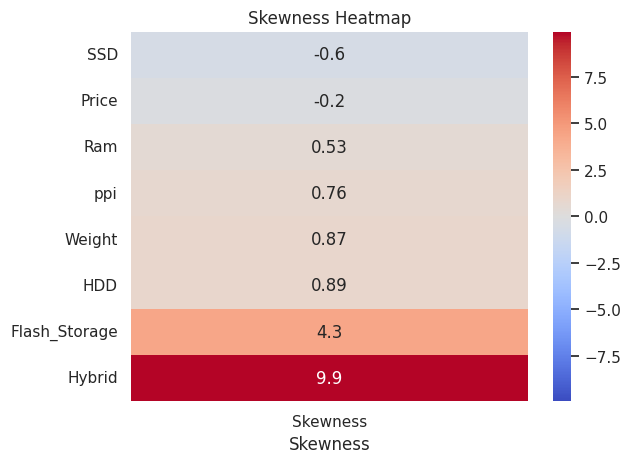

In [102]:
skewness_heatmap(train_cop, num_cols)

# Correlation

In [103]:
def plot_correlation_heatmap(df, num_features):
    
    corr = df[num_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()    

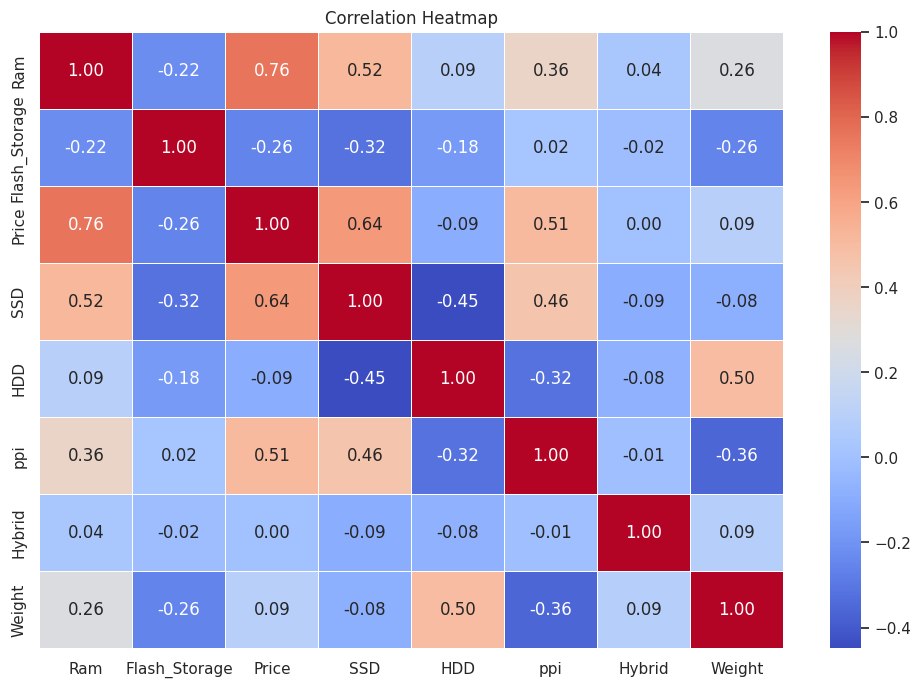

In [104]:
plot_correlation_heatmap(train_cop, num_cols)

In [105]:
from scipy.stats import shapiro
def shapiro_test_normality(df, num_cols, sample_size=500, alpha=0.001):
    feats_std_scale = []
    feats_min_max_scale = []
    
    # Sample a subset of the data
    sample_data = df.sample(replace=False, n=sample_size)

    for col in num_cols:
        # Perform Shapiro-Wilk test
        stat, p = shapiro(sample_data[col])
        print(f'W_Statistic={stat:.3f}, p={p:.8f}')

        # Check for normality
        if p > alpha:
            print(f'{col} looks like Gaussian (fail to reject H0)')
            feats_std_scale.append(col)
        else:
            print(f'{col} does not look Gaussian (reject H0)')
            feats_min_max_scale.append(col)

    return feats_std_scale, feats_min_max_scale    

In [106]:
feats_std_scale , feats_min_max_scale = shapiro_test_normality(train_cop, num_cols)

W_Statistic=0.858, p=0.00000000
Ram does not look Gaussian (reject H0)
W_Statistic=0.230, p=0.00000000
Flash_Storage does not look Gaussian (reject H0)
W_Statistic=0.992, p=0.00918977
Price looks like Gaussian (fail to reject H0)
W_Statistic=0.702, p=0.00000000
SSD does not look Gaussian (reject H0)
W_Statistic=0.716, p=0.00000000
HDD does not look Gaussian (reject H0)
W_Statistic=0.887, p=0.00000000
ppi does not look Gaussian (reject H0)
W_Statistic=0.061, p=0.00000000
Hybrid does not look Gaussian (reject H0)
W_Statistic=0.970, p=0.00000002
Weight does not look Gaussian (reject H0)


* **min_max_scale ('Weight', 'Ram', 'ppi', 'HDD', 'Flash_Storage', 'SSD', 'Hybrid')**
* **std_scale ('Price')**

# Pipline

In [107]:
class ColumnSelector(TransformerMixin, BaseEstimator):

    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X, y=None):
        X = X[self.columns]
        return X
    
    def fit_transform(self, X, y=None):
        return self.transform(X)
    


In [108]:
class Datatypefix(BaseEstimator, TransformerMixin):
 
    def __init__(self, cols=None):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.cols:
            if col == 'Ram':
                X_copy['Ram'] = X_copy['Ram'].str.replace('GB', '').astype('int32')
            elif col == 'Weight':    
                X_copy['Weight'] = X_copy['Weight'].str.replace('kg', '').astype('float32')
            elif col == 'Inches':
                X_copy['Inches'] = pd.to_numeric(X_copy['Inches'], errors='coerce')
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [109]:
class Extractionfeature(BaseEstimator, TransformerMixin):

    def __init__(self, cols=None):
        self.cols = cols
        
    def extract_memory(self, df):
        df['Memory'] = df['Memory'].str.replace('\.0', '', regex=True)
        df['Memory'] = df['Memory'].str.replace('GB', '')
        df['Memory'] = df['Memory'].str.replace('TB', '000')

        new = df['Memory'].str.split("+", n=1, expand=True)
        df['first'] = new[0].str.strip()
        df['second'] = new[1]

        df["Layer1HDD"] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer1SSD"] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer1Hybrid"] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer1Flash_Storage"] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

        df['first'] = df['first'].str.replace(r'\D', '', regex=True)
        df['second'].fillna("0", inplace=True)

        df["Layer2HDD"] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
        df["Layer2SSD"] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
        df["Layer2Hybrid"] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
        df["Layer2Flash_Storage"] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)
        df['second'] = df['second'].str.replace(r'\D', '', regex=True)

        df['first'] = df['first'].astype(int)
        df['second'] = df['second'].astype(int)

        df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
        df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
        df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
        df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]
        return df

    def fetch_processor(self, text):
        if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
            return text
        elif text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

    def cat_os(self, x):
        x_lower = x.lower()
        if "windows" in x_lower:
            return "Windows"
        elif "mac" in x_lower:
            return "Mac"
        else:
            return "Others/No OS/Linux"

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.cols:
            if col == 'ScreenResolution':
                X_copy['Touchscreen'] = X_copy['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
                X_copy['Ips'] = X_copy['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
                res = X_copy['ScreenResolution'].str.extract(r'(\d+x\d+)')
                res_split = res[0].str.split('x', n=1, expand=True)
                res_split.columns = ["X_res", "Y_res"]
                X_copy = pd.concat([X_copy, res_split], axis=1)
                X_copy['X_res'] = X_copy['X_res'].astype('int')
                X_copy['Y_res'] = X_copy['Y_res'].astype('int')
            elif col == 'Cpu':
                X_copy['Cpu Name'] = X_copy['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
                X_copy['Cpu brand'] = X_copy['Cpu Name'].apply(self.fetch_processor)
            elif col == 'Memory':
                X_copy = self.extract_memory(X_copy)
            elif col == 'Gpu':
                X_copy['Gpu brand'] = X_copy['Gpu'].apply(lambda x: x.split()[0])
                
            elif col == 'OpSys':
                X_copy['os'] = X_copy['OpSys'].apply(self.cat_os)

        # Add Pixels Per Inch (PPI) feature
        X_copy['ppi'] = (((X_copy['X_res']**2) + (X_copy['Y_res']**2))**0.5 / X_copy['Inches']).astype('float')
        return X_copy

    def fit_transform(self, X, y=None):
        return self.transform(X)

In [110]:
class Transformation(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, skew_threshold=1):
        
        self.cols = cols
        self.skew_threshold = skew_threshold
        self.skewed_columns = [] 

    def fit(self, X, y=None):
        
        if self.cols is None:
            self.cols = X.select_dtypes(include=[np.number]).columns
        
        self.skewed_columns = [
            col for col in self.cols if abs(X[col].skew()) > self.skew_threshold
        ]
        return self

    def transform(self, X):
        
        X_copy = X.copy()
        for col in self.skewed_columns:
            # Apply log transformation
            X_copy[col] = np.log1p(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
       
        return self.fit(X, y).transform(X)

In [111]:
class ScalingTransform(BaseEstimator, TransformerMixin):

    def __init__(self, cols, scaling_method):
        self.cols = cols
        self.scaler_ = None
        self.scaling_method = scaling_method

    def fit(self, X, y=None):
        if self.scaling_method == "std_scale":
            self.scaler_ = StandardScaler().fit(X.loc[:, self.cols])
        elif self.scaling_method == "min_max_scale":
            self.scaler_ = MinMaxScaler().fit(X.loc[:, self.cols])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy.loc[:, self.cols] = self.scaler_.transform(X_copy.loc[:, self.cols])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [112]:
class OneHotEncodeColumns(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        
        self.cols = cols
        self.encoder = None
        self.column_names = None

    def fit(self, X, y=None):
        
        self.encoder = OneHotEncoder(sparse=False, drop='first')
        self.encoder.fit(X[self.cols])
        self.column_names = self.encoder.get_feature_names_out(self.cols)
        return self

    def transform(self, X):
        
        X_copy = X.copy()

       
        encoded_data = self.encoder.transform(X_copy[self.cols])
        encoded_df = pd.DataFrame(encoded_data, columns=self.column_names, index=X_copy.index)

        
        X_copy = X_copy.drop(columns=self.cols)
        X_copy = pd.concat([X_copy, encoded_df], axis=1)

        return X_copy

    def fit_transform(self, X, y=None):
        
        self.fit(X, y)
        return self.transform(X)

In [113]:
class LabelEncodeColumns(BaseEstimator, TransformerMixin):

    def __init__(self, cols):
        self.cols = cols
        self.encoders_ = {}

    def fit(self, X, y=None):
        for col in self.cols:
            encoder = LabelEncoder()
            encoder.fit(X[col])
            self.encoders_[col] = encoder
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders_.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)
    

In [114]:
class DropColumnsTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, cols=None):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.cols is None:
            return X
        else:
            return X.drop(self.cols,axis=1)
        

In [115]:
class FullPipeline1:
    def __init__(self):
        self.all_cols = ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
                         'Memory', 'Gpu', 'OpSys', 'Weight']

        self.drop_cols = ['ScreenResolution', 'X_res', 'Y_res', 'Inches', 'Cpu', 'Cpu Name', 'first', 'second', 
                          'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 
                          'Layer2Hybrid', 'Layer2Flash_Storage', 'Hybrid','Flash_Storage', 'Memory', 'Gpu', 'OpSys']

        self.encode_cols = ['TypeName', 'Company', 'Cpu brand', 'Gpu brand', 'os']
        self.scale_cols = feats_min_max_scale

        self.full_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=self.all_cols)),
            ('data_fix', Datatypefix(cols=self.all_cols)),
            ('extract_feature', Extractionfeature(cols=self.all_cols)),
            ('power_transformation', Transformation(cols=list(set(num_cols) - set(['Price'])))),
            ('label_encode', OneHotEncodeColumns(cols=self.encode_cols)),
            ('scaling', ScalingTransform(cols=list(set(self.scale_cols)-set(['Price'])),
                                         scaling_method="min_max_scale")),
            ('drop_cols', DropColumnsTransformer(cols=self.drop_cols))
        ])

        self.y_pipeline = Pipeline([
            ('selector', ColumnSelector(columns=['Price'])),
            ('power_transformation', Transformation(cols=['Price'])),
            ('scaling', ScalingTransform(cols=['Price'], scaling_method="std_scale"))
        ])

    def fit_transform(self, X_train, y_train):
        X_train = self.full_pipeline.fit_transform(X_train)
        y_train = self.y_pipeline.fit_transform(y_train)
        return X_train, y_train

    def transform(self, X_test, y_test):
        X_test = self.full_pipeline.transform(X_test)
        y_test = self.y_pipeline.transform(y_test)
        return X_test, y_test


In [116]:
full_pipeline1 = FullPipeline1()
X_train_pre, y_train_pre = full_pipeline1.fit_transform(X_train, y_train)


In [117]:
X_train_pre.shape, y_train_pre.shape

((1015, 39), (1015, 1))

In [118]:
X_test_pre, y_test_pre  = full_pipeline1.transform(X_test, y_test)

In [119]:
X_test_pre.shape, y_test_pre.shape

((254, 39), (254, 1))

# Modeling

## baseline

In [120]:
def baseline_reg(X_train, y_train, X_test, y_test, strategy='mean'):
    dummy_regressor = DummyRegressor(strategy=strategy)
    dummy_regressor.fit(X_train, y_train)
    dummy_predictions = dummy_regressor.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, dummy_predictions)
    mae = mean_absolute_error(y_test, dummy_predictions)
    r2 = r2_score(y_test, dummy_predictions)

    # Print the results
    print("Baseline MSE:", mse)
    print("Baseline MAE:", mae)
    print("Baseline R2 Score:", r2)

In [121]:
baseline_reg(X_train_pre, y_train_pre, X_test_pre, y_test_pre)

Baseline MSE: 1.0142374092915427
Baseline MAE: 0.8228376736362579
Baseline R2 Score: -0.062389032560870694


## Model Selection

In [122]:
models = [
    LinearRegression(),
    Ridge(random_state=ord("S")),
    Lasso(random_state=ord("S")),
    ElasticNet(random_state=ord("S")),
    DecisionTreeRegressor(random_state=ord("S")),
    RandomForestRegressor(random_state=ord("S")),
    GradientBoostingRegressor(random_state=ord("S")),
    XGBRegressor(random_state=ord("S")),
    ExtraTreesRegressor(random_state=ord("S")),
    BaggingRegressor(random_state=ord("S")),
    AdaBoostRegressor(random_state=ord("S")),
    CatBoostRegressor(random_state=ord("S"),verbose=False),
    # LGBMRegressor(random_state=ord("S"), verbose=False),
    SVR(),
    KNeighborsRegressor()
]

In [123]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate

def evaluate_models_reg(models, X_train, y_train, X_test, y_test, cv):
    results = []
    start_total = time.time()  # Total execution time for all models

    for model in models:
        start = time.time()  # Time for each model evaluation

        # Cross-validation scores
        scores = cross_validate(model, X_train, y_train, cv=cv,
                                scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'],
                                return_train_score=True)
        
        # Mean scores from cross-validation (for training)
        mean_train_mae = -np.mean(scores['train_neg_mean_absolute_error'])
        mean_train_rmse = np.sqrt(-np.mean(scores['train_neg_mean_squared_error']))
        mean_train_r2 = np.mean(scores['train_r2'])
        
        # Test set evaluation
        model.fit(X_train, y_train)
        test_preds = model.predict(X_test)
        
        test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
        test_mae = mean_absolute_error(y_test, test_preds)
        test_r2 = r2_score(y_test, test_preds)

        # Train set evaluation
        train_preds = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
        train_mae = mean_absolute_error(y_train, train_preds)
        
        # Store results
        results_dict = {
            'Algorithm': model.__class__.__name__,
            'Train Score': mean_train_r2,
            'Test Score': test_r2,
            'Train MAE': mean_train_mae,
            'Test MAE': test_mae,
            'Train RMSE': train_rmse,
            'Test RMSE': test_rmse,
            'Train MSE': mean_train_rmse,
            'Test MSE': test_rmse
        }
        results.append(results_dict)

    total_time = time.time() - start_total  # Total execution time for all models
    results_df = pd.DataFrame(results)
    results_df.set_index('Algorithm', inplace=True)
    results_df['Total Time'] = total_time  # Adding total execution time
    results_df = results_df.sort_values(by='Test Score', ascending=False)

    return results_df


In [124]:
result = evaluate_models_reg(models, X_train_pre, y_train_pre, X_test_pre, y_test_pre, 5)

In [1]:
result

NameError: name 'result' is not defined

## Best performing models based on multiple metrics (MAE, RMSE, and R²):
* **RandomForestRegressor**
* **CatBoostRegressor**
* **XGBRegressor**

# Fine Tuning

In [126]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=ord("S"))


param_dist_rf = {
    'n_estimators': randint(100, 1000),  
    'max_depth': randint(3, 15),           
    'min_samples_split': randint(2, 20),   
    'min_samples_leaf': randint(1, 20),    
    'max_features': uniform(0.1, 0.9),     
    'bootstrap': [True, False]             
}


rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)
rf_random.fit(X_train_pre, y_train_pre)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=83),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ed5faf0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ed5d0c0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5aba44c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ed5f4c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ed5d930>},
                   random_state=42, verbose=1)

In [127]:
catboost = CatBoostRegressor(random_state=ord("S"), verbose=0)

# Reduced parameter search space
param_dist_cb = {
    'iterations': randint(100, 1000),    
    'depth': randint(3, 10),             
    'learning_rate': uniform(0.01, 0.05), 
    'l2_leaf_reg': uniform(1, 5),         
    'border_count': randint(32, 100),     
}


cb_random = RandomizedSearchCV(estimator=catboost, 
                               param_distributions=param_dist_cb, 
                               n_iter=20,  
                               cv=2,      
                               verbose=1, 
                               random_state=42, 
                               n_jobs=-1)   

cb_random.fit(X_train_pre, y_train_pre)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7dcc5ed5df60>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'border_count': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5a2f3f70>,
                                        'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ed5e260>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ed5db70>,
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ec9ee90>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ec9cac0>},
                   random_state=42, verbose=1)

In [128]:
from xgboost import XGBRegressor


xgb = XGBRegressor(random_state=ord("S"))


param_dist_xgb = {
    'n_estimators': randint(100, 2000),  
    'learning_rate': uniform(0.01, 0.3), 
    'max_depth': randint(3, 15),          
    'subsample': uniform(0.5, 0.5),       
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1),               
    'reg_alpha': uniform(0, 1),          
    'reg_lambda': uniform(0, 1)          
}


xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=100, cv=3, verbose=1, random_state=42, n_jobs=-1)
xgb_random.fit(X_train_pre, y_train_pre)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dcc5ec9dd20>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ed5e290>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ec9ecb0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dcc5ac115a0>},
                   random_state=42, verbose=1)

In [129]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2


# Evaluate models with the best estimators
rf_train_mae, rf_train_rmse, rf_train_r2 = evaluate_model(rf_random.best_estimator_, X_train_pre, y_train_pre)
rf_test_mae, rf_test_rmse, rf_test_r2 = evaluate_model(rf_random.best_estimator_, X_test_pre, y_test_pre)

catboost_train_mae, catboost_train_rmse, catboost_train_r2 = evaluate_model(cb_random.best_estimator_, X_train_pre, y_train_pre)
catboost_test_mae, catboost_test_rmse, catboost_test_r2 = evaluate_model(cb_random.best_estimator_, X_test_pre, y_test_pre)

xgb_train_mae, xgb_train_rmse, xgb_train_r2 = evaluate_model(xgb_random.best_estimator_, X_train_pre, y_train_pre)
xgb_test_mae, xgb_test_rmse, xgb_test_r2 = evaluate_model(xgb_random.best_estimator_, X_test_pre, y_test_pre)

# Create a results DataFrame to compare all models
results = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'CatBoostRegressor', 'XGBRegressor'],
    'Best Hyperparameters': [
        rf_random.best_params_,
        cb_random.best_params_,
        xgb_random.best_params_
    ],
    'Train MAE': [rf_train_mae, catboost_train_mae, xgb_train_mae],
    'Test MAE': [rf_test_mae, catboost_test_mae, xgb_test_mae],
    'Train RMSE': [rf_train_rmse, catboost_train_rmse, xgb_train_rmse],
    'Test RMSE': [rf_test_rmse, catboost_test_rmse, xgb_test_rmse],
    'Train R²': [rf_train_r2, catboost_train_r2, xgb_train_r2],
    'Test R²': [rf_test_r2, catboost_test_r2, xgb_test_r2]
})

results


,Model,Best Hyperparameters,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
0,RandomForestRegressor,"{'bootstrap': False, 'max_depth': 13, 'max_fea...",0.188197,0.253389,0.244715,0.331040,0.940115,0.885210
1,CatBoostRegressor,"{'border_count': 55, 'depth': 5, 'iterations':...",0.165479,0.231917,0.213665,0.306151,0.954347,0.901822
2,XGBRegressor,"{'colsample_bytree': 0.6186133958679972, 'gamm...",0.156863,0.223535,0.198300,0.300560,0.960677,0.905375


* **the defualt parameter is good**

### Voting Regressor

In [130]:
from sklearn.ensemble import VotingRegressor
models = [
    ('RandomForest', RandomForestRegressor(random_state=ord("S"))),
    ('CatBoost', CatBoostRegressor(random_state=ord("S"), verbose=False)),
    ('XGB', XGBRegressor(random_state=ord("S")))
]

# Create the Voting Regressor
voting_regressor = VotingRegressor(estimators=models)

# Train the Voting Regressor
voting_regressor.fit(X_train_pre, y_train_pre)

# Function to evaluate the model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

# Train set performance
voting_train_mae, voting_train_rmse, voting_train_r2 = evaluate_model(voting_regressor, X_train_pre, y_train_pre)

# Test set performance
voting_test_mae, voting_test_rmse, voting_test_r2 = evaluate_model(voting_regressor, X_test_pre, y_test_pre)

# Display results
voting_results = pd.DataFrame({
    'Model': ['Voting Regressor'],
    'Train MAE': [voting_train_mae],
    'Test MAE': [voting_test_mae],
    'Train RMSE': [voting_train_rmse],
    'Test RMSE': [voting_test_rmse],
    'Train R²': [voting_train_r2],
    'Test R²': [voting_test_r2]
})

voting_results

,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
0,Voting Regressor,0.102651,0.216096,0.134326,0.292618,0.981956,0.910309


### Stacking Regressor

In [131]:
from sklearn.ensemble import StackingRegressor



base_models = [
    ('RandomForest', RandomForestRegressor(random_state=ord("S"))),
    ('CatBoost', CatBoostRegressor(random_state=ord("S"), verbose=False)),
    ('XGB', XGBRegressor(random_state=ord("S")))
]


meta_model = LinearRegression()


stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)


stacking_regressor.fit(X_train_pre, y_train_pre)


def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

# Train set performance
stacking_train_mae, stacking_train_rmse, stacking_train_r2 = evaluate_model(stacking_regressor, X_train_pre, y_train_pre)

# Test set performance
stacking_test_mae, stacking_test_rmse, stacking_test_r2 = evaluate_model(stacking_regressor, X_test_pre, y_test_pre)

# Display results
stacking_results = pd.DataFrame({
    'Model': ['Stacking Regressor'],
    'Train MAE': [stacking_train_mae],
    'Test MAE': [stacking_test_mae],
    'Train RMSE': [stacking_train_rmse],
    'Test RMSE': [stacking_test_rmse],
    'Train R²': [stacking_train_r2],
    'Test R²': [stacking_test_r2]
})

stacking_results


,Model,Train MAE,Test MAE,Train RMSE,Test RMSE,Train R²,Test R²
0,Stacking Regressor,0.130756,0.216138,0.168951,0.29485,0.971456,0.908936


* **voting regressor is the best**

In [132]:

def plot_regression_performance(y_test, y_pred, color='m'):

    y_test_series = pd.Series(y_test.iloc[:, 0]).reset_index(drop=True)
    y_pred_series = pd.Series(y_pred)
    
    fig, axs = plt.subplots(ncols=3, figsize=(15,5))

    axs[0].scatter(y_test_series, y_pred_series, color=color)
    axs[0].plot([y_test_series.min(), y_test_series.max()], [y_test_series.min(), y_test_series.max()], 'k--', lw=3, color='k')
    axs[0].set_xlabel('Actual Values')
    axs[0].set_ylabel('Predicted Values')
    axs[0].set_title('Scatter Plot with Regression Line')

    errors = y_test_series - y_pred_series
    axs[1].hist(errors, bins=50, color=color)
    axs[1].axvline(x=errors.median(), color='k', linestyle='--', lw=3)
    axs[1].set_xlabel('Errors')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Histogram of Errors')

    axs[2].scatter(y_pred_series, errors, color=color)
    axs[2].axhline(y=0, color='k', linestyle='-', lw=3)
    axs[2].set_xlabel('Predicted Values')
    axs[2].set_ylabel('Errors')
    axs[2].set_title('Residual Plot')

    plt.tight_layout()
    plt.show()

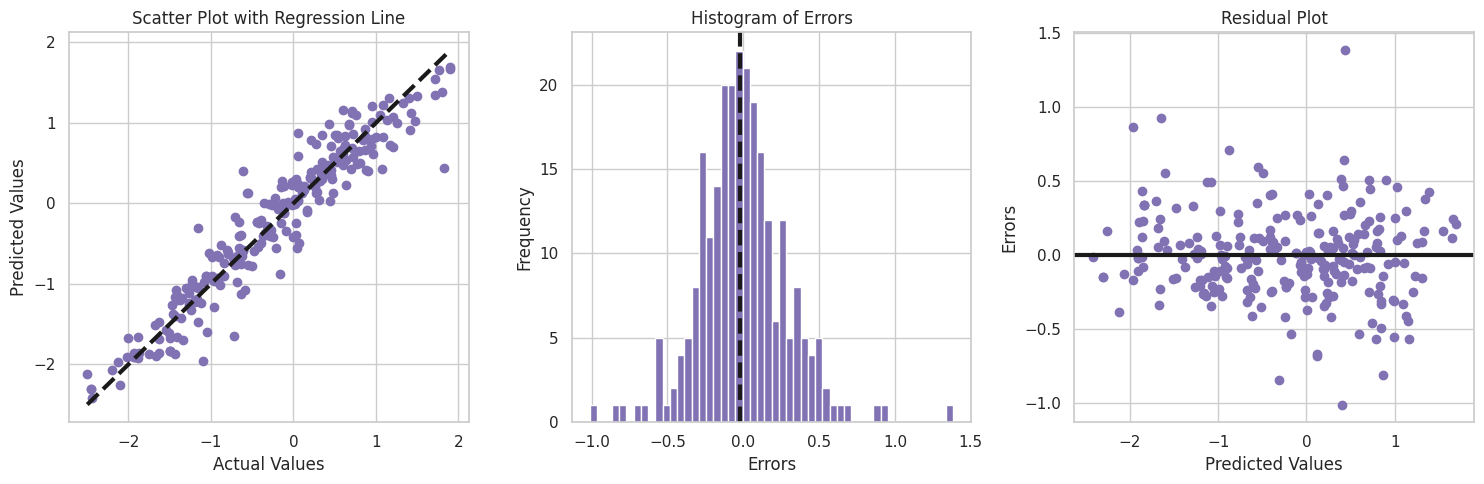

In [133]:
plot_regression_performance(y_test_pre, voting_regressor.predict(X_test_pre))

* **that's plot prove the model work well**
* **Thank you for reading through this notebook. I hope the analysis was insightful and helpful.**

In [ ]:
# Save the trained model and preprocessing pipeline for Flask API
import joblib
import os

# Save the best performing model (voting regressor)
model_path =  "laptop_price_voting_regressor.pkl"
joblib.dump(voting_regressor, model_path)
print(f"Model saved to: {model_path}")

# Save the complete preprocessing pipeline 
pipeline_path = "preprocessing_pipeline.pkl"
joblib.dump(full_pipeline1, pipeline_path)
print(f"Preprocessing pipeline saved to: {pipeline_path}")